In [3]:
#IMPORT LIBRARIES 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# IMPORT DATASET
dataset = pd.read_csv("orders_2020_2021_DataSet_Updated.csv")



dataset['Same_Billing_Shipping_Address']=dataset['Download Status']
dataset['Multiple_Orders']=dataset['Download Status']
dataset['Unusual_Large_Orders']=dataset['Download Status']
dataset['Multiple_Orders_via_diff_payment']=dataset['Download Status']
dataset['Unexpected_international_orders']=dataset['Download Status']

dataset['Same_Billing_Shipping_Address_item']=dataset['Download Status']
dataset['Multiple_Orders_item']=dataset['Download Status']
dataset['Unusual_Large_Orders_item']=dataset['Download Status']
dataset['Multiple_Orders_via_diff_payment_item']=dataset['Download Status']
dataset['Unexpected_international_orders_item']=dataset['Download Status']

df1=dataset[['Order #','Billing Street Address','Shipping Street Address','LineItem Name']]
df1 = df1.dropna()


#number of rows in df1
n=df1.shape[0]

# 1. Finding orders having The shipping address differs from the billing address.
i=0
j=0
for i in range(n):
  if ((pd.notnull(df1['Billing Street Address'].iloc[i])!=df1['Shipping Street Address'].iloc[i])):
    dataset['Same_Billing_Shipping_Address'].iloc[j] = df1['Order #'].iloc[i]
    dataset['Same_Billing_Shipping_Address_item'].iloc[j] = df1['LineItem Name'].iloc[i]
    j=j+1
i= i+1

# 2. Multiple Order of Same Item
i=0
j=0
k=0
for i in range(3039):
    for j in range(3039):
        if (i!=j):
            if (dataset['Shipping Street Address'].iloc[i]==dataset['Shipping Street Address'].iloc[j]):
                dataset['Multiple_Orders'].iloc[k] = dataset['Order #'].iloc[i]
                dataset['Multiple_Orders_item'].iloc[k] = dataset['LineItem Name'].iloc[i]
                k=k+1 
    j=j+1
i=i+1

# 3. Unusual Large Orders
i=0
j=0
for i in range(3039):
  if (dataset['LineItem Sale Price'].iloc[i]>20000):
    dataset['Unusual_Large_Orders'].iloc[j] = dataset['Order #'].iloc[i]
    dataset['Unusual_Large_Orders_item'].iloc[j] = dataset['LineItem Name'].iloc[i]
    j=j+1
i= i+1

# 4. Multiple orders to the same address with different payment method
i=0
j=0
k=0
for i in range(3039):
    for j in range(3039):
        if (i!=j):
            if ((dataset['Shipping Street Address'].iloc[i]==dataset['Shipping Street Address'].iloc[j])and(dataset['LineItem Name'].iloc[i]==dataset['LineItem Name'].iloc[j])and(dataset['Payment Method'].iloc[i]!=dataset['Payment Method'].iloc[j])):
                dataset['Multiple_Orders_via_diff_payment'].iloc[k] = dataset['Order #'].iloc[i]
                dataset['Multiple_Orders_via_diff_payment_item'].iloc[k] = dataset['LineItem Name'].iloc[i]
                k=k+1 
    j=j+1
i=i+1

# 5. Unexpected_international_orders
i=0
j=0
for i in range(3039):
  if (dataset['Shipping Country'].iloc[i]!='IND'):
    dataset['Unexpected_international_orders'].iloc[j] = dataset['Order #'].iloc[i]
    dataset['Unexpected_international_orders_item'].iloc[j] = dataset['LineItem Name'].iloc[i]
    j=j+1
i= i+1

#Save all data in an excel file
df=dataset[['Same_Billing_Shipping_Address','Same_Billing_Shipping_Address_item','Multiple_Orders','Multiple_Orders_item','Unusual_Large_Orders','Unusual_Large_Orders_item','Multiple_Orders_via_diff_payment','Multiple_Orders_via_diff_payment_item','Unexpected_international_orders','Unexpected_international_orders_item']]
df = df.dropna(how='all')
df.to_excel('Fraud_Buyers_Identification.xlsx')


C:\Users\HP\AppData\Local\Temp\ipykernel_2024\3196543798.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Same_Billing_Shipping_Address'].iloc[j] = df1['Order #'].iloc[i]
C:\Users\HP\AppData\Local\Temp\ipykernel_2024\3196543798.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Same_Billing_Shipping_Address_item'].iloc[j] = df1['LineItem Name'].iloc[i]
C:\Users\HP\AppData\Local\Temp\ipykernel_2024\3196543798.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

Enter 1 to - Find orders having The shipping address differs from the billing address. 

Enter 2 to - Find Multiple Order of Same Item 

Enter 3 to - Find Unusual Large Orders  

Enter 4 to - Find Multiple orders to the same address with different payment method 

Enter 5 to - Find Unexpected_international_orders 

Enter a number: 3


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


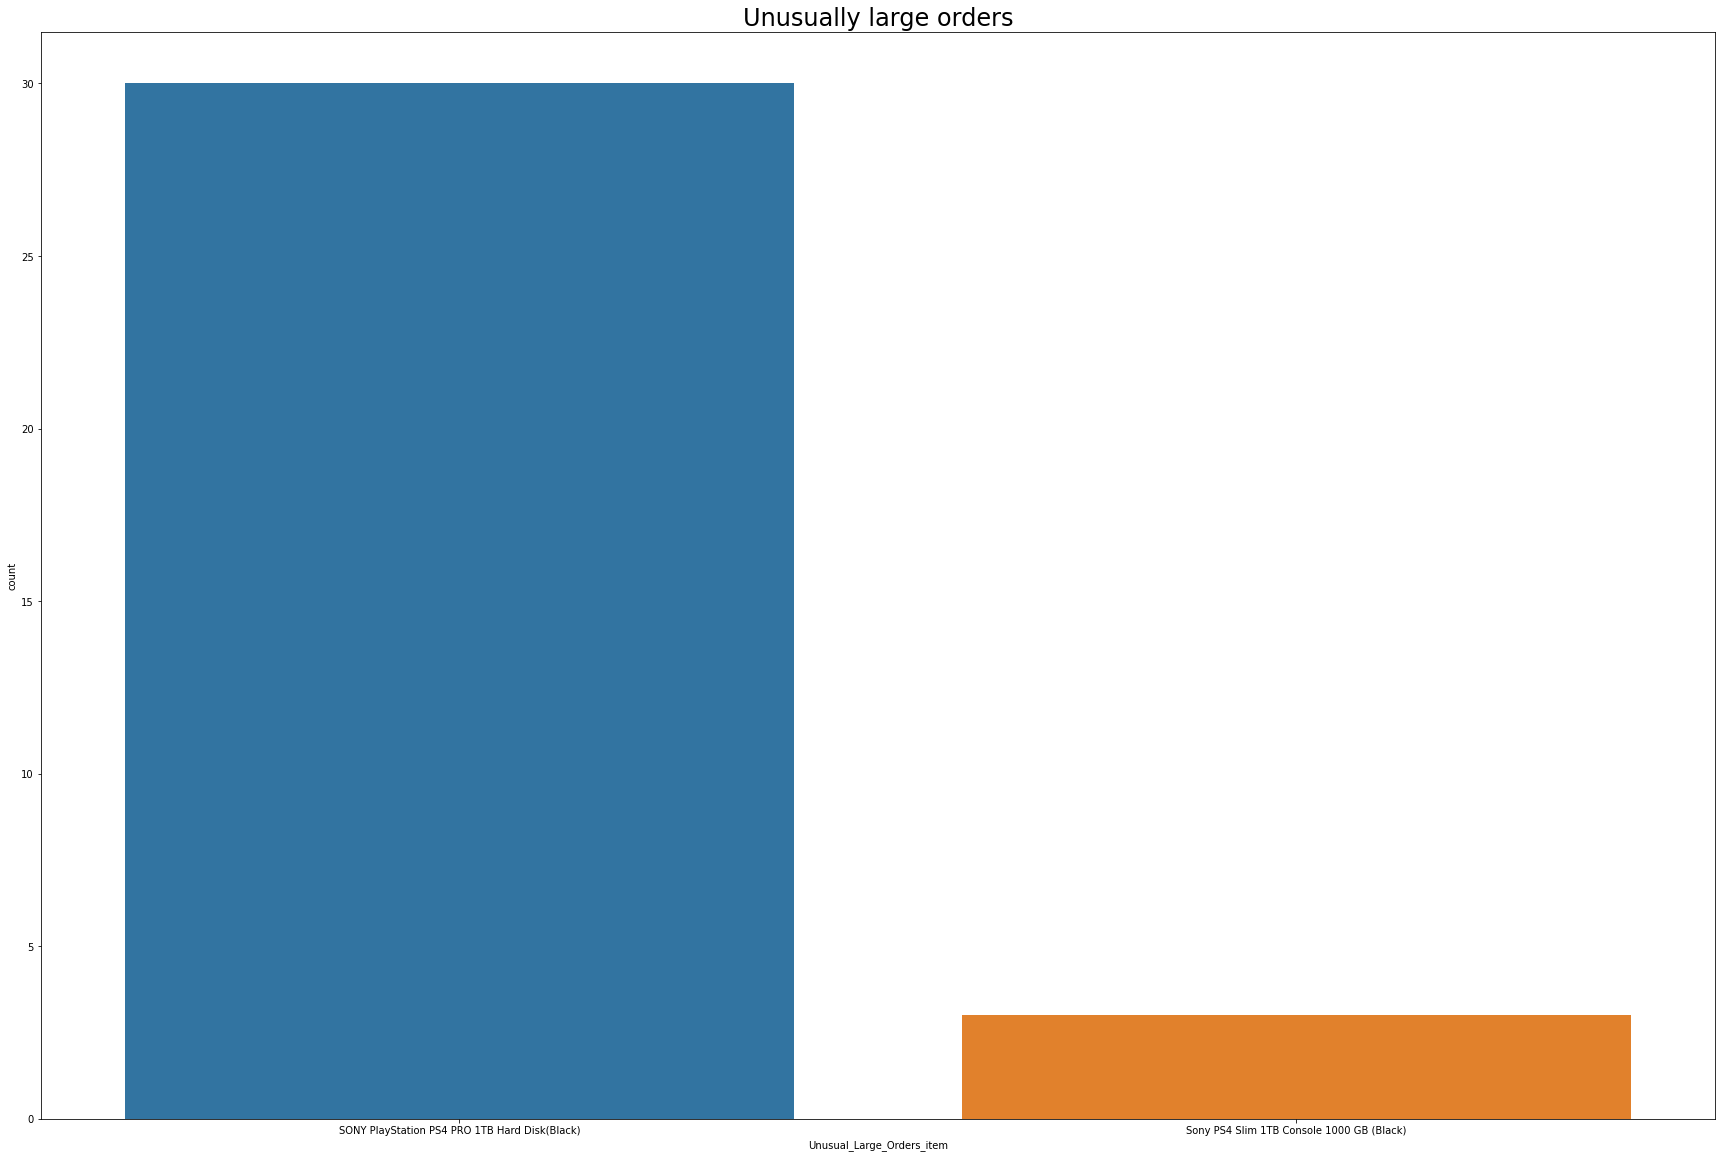

In [4]:
print("Enter 1 to - Find orders having The shipping address differs from the billing address. \n")
print("Enter 2 to - Find Multiple Order of Same Item \n")
print("Enter 3 to - Find Unusual Large Orders  \n")
print("Enter 4 to - Find Multiple orders to the same address with different payment method \n")
print("Enter 5 to - Find Unexpected_international_orders \n")


# Taking input from the user as integer
num = int(input("Enter a number: "))

if(num==1):
    # PLOT - The shipping address differs from the billing address
    plt.figure(figsize=(70,50))
    plt.title( "The shipping address differs from the billing address" , size = 24 )
    sns.countplot(y='Same_Billing_Shipping_Address_item', data=dataset)
    #plt.savefig('Fraud_check_1.pdf')
    plt.show()
    
elif(num==2):
    # PLOT - Multiple orders of the same item
    plt.figure(figsize=(80,50))
    plt.title( "Multiple orders of the same item" , size = 24 )
    sns.countplot(y='Multiple_Orders_item',data=dataset)
    #plt.savefig('Fraud_check_2.pdf')
    plt.show()

elif (num == 3):
    # PLOT - Unusually large orders
    plt.figure(figsize=(30,20))
    plt.title( "Unusually large orders" , size = 24 )
    sns.countplot(dataset['Unusual_Large_Orders_item'])
    #plt.savefig('Fraud_check_3.pdf')
    plt.show()

elif (num == 4):
    # PLOT - Multiple orders to the same address with different payment method
    plt.figure(figsize=(80,40))
    plt.title( "Multiple orders to the same address with different payment method" , size = 24 )
    sns.countplot(y='Multiple_Orders_via_diff_payment_item',data=dataset)
    #plt.savefig('Fraud_check_4.pdf')
    plt.show()

elif (num == 5):
    # PLOT - Unexpected international orders
    plt.figure(figsize=(60,30))
    plt.title( "Unexpected international orders" , size = 24 )
    sns.countplot(y='Unexpected_international_orders_item',data = dataset)
    #plt.savefig('Fraud_check_5.pdf')
    plt.show()  